# ipyleaflet - NAD27

Testing the NAD27 datum with ipyleaflet

In [1]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, projections, GeoData, DrawControl, LayersControl, FullScreenControl, WMSLayer
import geopandas as gpd
from ipywidgets import Label, HBox, VBox, Layout
from pyproj import Transformer
import matplotlib.pyplot as plt
from sidecar import Sidecar

The following cell is to avoid putting the data we need in the repo. The idea is that we have multiple datasets and we only downlod what we need for each notebook.


In [2]:
from catalog import import_data
import_data()

SUBMITTING | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/1 [00:00<?, ?it/s]

processing: partial-texas-counties


COLLECTING | :   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
#EPSG 32040 NAD27 Stateplane TX South Central
EPSG_32040 = {
    'name': 'EPSG:32040',
    'custom': True,
    'proj4def': '+proj=lcc +lat_1=28.38333333333333 +lat_2=30.28333333333333 +lat_0=27.83333333333333 +lon_0=-99 +x_0=609601.2192024384 +y_0=0 +datum=NAD27 +units=us-ft +no_defs',
    'origin': [1934715.99110518, 505965.75122003],
    'bounds': [
        [60341.26161686, 30289.16709928],
        [3757196.70267378, 1073405.75104801]
    ],
    'resolutions': [
        8192.0,
        4096.0,
        2048.0,
        1024.0,
        512.0
    ]
}
# So you we what the lat lon would be for regular WGS84 datum
transformer = Transformer.from_crs(4267, 4326)

In [4]:
# This is to see the map on the side panel
sc = Sidecar(title='ipyleaflet map')
coord_nad27_label = Label()
coord_wgs84_label =  Label()
feature_label = Label()

def handle_interaction(**kwargs):
    if kwargs.get('type') == 'mousemove':
        native_coordinates = kwargs.get('coordinates')
        w84_coordinates = transformer.transform(native_coordinates[0], native_coordinates[1])
        coord_nad27_label.value = f' NAD27 coordinates: {str(native_coordinates)}'
        coord_wgs84_label.value = f' WGS84 coordinates: {str(list(w84_coordinates))}'

m = Map(center=(32, -104),
        zoom=3,
        layers=(),
        scroll_wheel_zoom=True,
        crs=EPSG_32040)

m.on_interaction(handle_interaction)
m.add_control(LayersControl(position='topright'))
m.add_control(FullScreenControl())

with sc:
    display(VBox([m, coord_nad27_label, coord_wgs84_label, feature_label], layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    height='100%'
)))

In [5]:
#COUNTIES_PERMIAN_AREA CRS: NAD27
selDf = gpd.read_file('data/texas-counties/COUNTIES_PERMIAN_AREA.shp')
selDf.head()

,TYPE,STATE,COUNTY,SNAME,CNAME,SHAPE_AREA,SHAPE_LEN,geometry
0,2.0,30,5,NM,CHAVES,1.524509,7.008728,"POLYGON ((-103.94562 34.08263, -103.92830 34.0..."
1,2.0,30,25,NM,LEA,1.095513,4.650699,"POLYGON ((-103.25276 33.57043, -103.23540 33.5..."
2,2.0,30,57,NM,TORRANCE,0.851955,4.110356,"POLYGON ((-105.92329 34.25978, -105.92662 34.2..."
3,2.0,30,9,NM,CURRY,0.358178,2.693328,"POLYGON ((-103.04341 34.31678, -103.04334 34.3..."
4,2.0,30,11,NM,DE BACA,0.592203,3.453959,"POLYGON ((-103.94562 34.08263, -103.96314 34.0..."


In [6]:
selDf.crs

<Geographic 2D CRS: EPSG:4267>
Name: NAD27
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North and central America: Antigua and Barbuda - onshore. Bahamas - onshore plus offshore over internal continental shelf only. Belize - onshore. British Virgin Islands - onshore. Canada onshore - Alberta, British Columbia, Manitoba, New Brunswick, Newfoundland and Labrador, Northwest Territories, Nova Scotia, Nunavut, Ontario, Prince Edward Island, Quebec, Saskatchewan and Yukon - plus offshore east coast. Cuba - onshore and offshore. El Salvador - onshore. Guatemala - onshore. Honduras - onshore. Panama - onshore. Puerto Rico - onshore. Mexico - onshore plus offshore east coast. Nicaragua - onshore. United States (USA) onshore and offshore - Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, Florida, Georgia, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, 

In [7]:
#Convert to NAD27 Stateplane TX South Central
geoDf = selDf.to_crs(epsg=32040)
geoDf.head()

,TYPE,STATE,COUNTY,SNAME,CNAME,SHAPE_AREA,SHAPE_LEN,geometry
0,2.0,30,5,NM,CHAVES,1.524509,7.008728,"POLYGON ((497845.767 2306573.547, 503097.392 2..."
1,2.0,30,25,NM,LEA,1.095513,4.650699,"POLYGON ((701393.313 2111480.948, 706691.873 2..."
2,2.0,30,57,NM,TORRANCE,0.851955,4.110356,"POLYGON ((-98413.409 2401630.652, -99420.313 2..."
3,2.0,30,9,NM,CURRY,0.358178,2.693328,"POLYGON ((774711.951 2381504.453, 774554.350 2..."
4,2.0,30,11,NM,DE BACA,0.592203,3.453959,"POLYGON ((497845.767 2306573.547, 492528.687 2..."


In [8]:
geoDf.crs

<Projected CRS: EPSG:32040>
Name: NAD27 / Texas South Central
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Texas - counties of Aransas; Atascosa; Austin; Bandera; Bee; Bexar; Brazoria; Brewster; Caldwell; Calhoun; Chambers; Colorado; Comal; De Witt; Dimmit; Edwards; Fayette; Fort Bend; Frio; Galveston; Goliad; Gonzales; Guadalupe; Harris; Hays; Jackson; Jefferson; Karnes; Kendall; Kerr; Kinney; La Salle; Lavaca; Live Oak; Matagorda; Maverick; McMullen; Medina; Presidio; Real; Refugio; Terrell; Uvalde; Val Verde; Victoria; Waller; Wharton; Wilson; Zavala. Gulf of Mexico outer continental shelf (GoM OCS) protraction areas: Matagorda Island; Brazos; Galveston; High Island, Sabine Pass (TX).
- bounds: (-105.0, 27.78, -93.41, 30.67)
Coordinate Operation:
- name: Texas CS27 South Central zone
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1927
- Ellipsoid: Clarke 1866
- Prime M

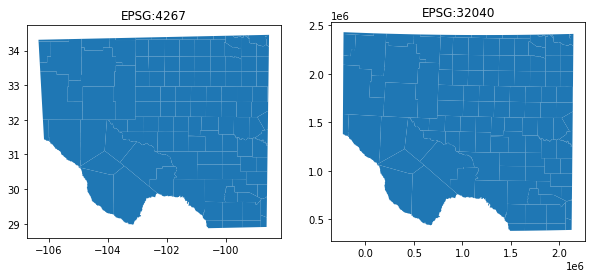

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

selDf.plot(ax=axs[0], legend=True)
axs[0].set_title('EPSG:4267')
geoDf.plot(ax=axs[1], legend=True)
axs[1].set_title('EPSG:32040')
plt.show()

In [10]:
def handle_feature_click(feature, **kwargs):
    feature_label.value = str(feature['properties']['CNAME'])

# You don't need to use the reprojected dataframe. Leaflet uses geodetic lat lons and reprojects vector
geoData = GeoData(geo_dataframe=selDf, name='Counties')
geoData.on_click(handle_feature_click)
m.add_layer(geoData)

Because leaflet was already initialized as 32040 you don't need to reproject your dataframe. It knows how to project it and get you back the proper coordinate using NAD27. There are caveats with different datums, especially if you want to do other operations with "regular" data based on WGS84.

The next cell uses a OpenStreet map layer as base layer but their WMS doesn't support 32040 so you'll see the inconsistencies.
I couldn't find a good WMS service that supported state plane projections for base layers.

In [11]:
wms = WMSLayer(url='https://ows.terrestris.de/osm/service',
               name='Unprojected base layer',
               layers='OSM-Overlay-WMS',
               min_zoom=1,
               tile_size=256)
m.add_layer(wms)